In this miniproject, we will:

**create two separate customer segmentations (using clustering) to split them into 3-5 clusters:**



based on demographics (only on the information from twm_customer)


**based on their banking behavior. We can take following things into consideration as banking behavior:
do they have savings account? How much do they save?
do they have credit account? How much do they live in debt?
are they making lot of small transactions or few huge ones?**



visualize the created clusters using radar charts and compare them agains each other



visualize segmentations using scatter plot. We will have to use PCA to be able to plot our observations in 2D.



(stretch) visualize in 2D how our clusters are evolving in each iteration of KMeans (for at least 20 iterations).
we will need to create own implementation of kmeans so we can see what is happening with the clusters during the iterations.

Plan: using the K means algoritm to do unsupervised learning, based on the banking accounts
Balance difference may be a good indicator on how much they spent. 
    - Note: It may have to be scaled to how much money they had (maybe use minimum balance as a baseline for people) 
    
sample = each customer
cluster customers into different behavioural categories. 
what person does person A belong to. 
decide based on these features, which cluster to throw them into. 

You have to cd into the directory first
git: https://github.com/joao-l-rossi/mini_project_III

Git guide: https://medium.com/@jonathanmines/the-ultimate-github-collaboration-guide-df816e98fb67

In [280]:
#import packages
import pandas as pd
import numpy as np
# import make_blobs from sklearn
import sqlite3
from sklearn.datasets import make_blobs
# import matplotlib
import matplotlib.pyplot as plt
# import Kmeans from sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


In [138]:
#Function for getting SQL database
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

connection = create_connection("twm_banking.sqlite")
df_checking = pd.read_sql_query("SELECT * FROM checking_acct", connection)
df_accounts = pd.read_sql_query("SELECT * FROM accounts", connection)
df_savings = pd.read_sql_query("SELECT * FROM savings_acct", connection)
df_credits = pd.read_sql_query("SELECT * FROM credit_acct", connection)
df_customers = pd.read_sql_query("SELECT * FROM customers", connection)
df_trans = pd.read_sql_query("SELECT * FROM transactions", connection)
df_trans_cred = pd.read_sql_query("SELECT * FROM credit_tran", connection)
df_trans_ = pd.read_sql_query("SELECT * FROM credit_tran", connection)
df_trans_save = pd.read_sql_query("SELECT * FROM saving_tran", connection)
df_trans_check = pd.read_sql_query("SELECT * FROM checking_tran", connection)

Connection to SQLite DB successful


In [57]:
df_accounts

,index,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,balance_difference
0,0,13628063,1362806,SV,Y,1995-12-10,None,1430.22,284.58,-1145.64
1,1,4561143213627090,1362709,CC,Y,1993-03-15,None,266.34,496.15,229.81
2,2,4561143213628360,1362836,CC,Y,1992-03-18,None,55.90,1000.00,944.10
3,3,13633112,1363311,CK,Y,1995-07-06,None,11017.13,968.46,-10048.67
4,4,4561143213633610,1363361,CC,Y,1994-06-17,None,849.37,462.28,-387.09
...,...,...,...,...,...,...,...,...,...,...
1404,1404,4561143213625560,1362556,CC,N,1992-01-20,1995-08-19,1433.94,20.00,-1413.94
1405,1405,4561143213626240,1362624,CC,Y,1990-11-29,None,632.75,1400.00,767.25
1406,1406,4561143213628750,1362875,CC,Y,1989-02-24,None,2810.91,3000.00,189.09
1407,1407,13626543,1362654,SV,Y,1992-10-17,None,784.53,622.46,-162.07


In [13]:
df_savings

,index,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,balance_difference
0,0,1363160,13631603,100,BS,Y,1988-05-09,None,113.04,122.54,9.50
1,1,1362487,13624873,500,MM,N,1994-06-27,1995-08-25,651.73,12.89,-638.84
2,2,1362548,13625483,100,BS,Y,1986-11-11,None,250.24,254.02,3.78
3,3,1362752,13627523,100,BS,Y,1995-02-20,None,600.26,609.33,9.07
4,4,1363017,13630173,100,BS,N,1994-04-27,1995-10-31,2011.02,2901.35,890.33
...,...,...,...,...,...,...,...,...,...,...,...
416,416,1363141,13631413,100,BS,Y,1994-11-11,None,177.33,528.57,351.24
417,417,1363038,13630383,100,BS,Y,1995-02-20,None,333.53,508.26,174.73
418,418,1362529,13625293,100,BS,Y,1992-11-15,None,662.06,873.14,211.08
419,419,1362895,13628953,100,BS,Y,1995-06-27,None,169.96,96.25,-73.71


In [58]:
people_saving = df_savings[df_savings['balance_difference']]


In [72]:
df_customers

,index,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,full_address,full_name
0,0,1362691,26150,46,5,1,M,2,,Donald,Marek,8298,Second,89194,Las Vegas,NV,8298 Second,Donald Marek
1,1,1362487,6605,71,1,0,M,2,,ChingDyi,Moussavi,10603,Daffodil,90159,Los Angeles,CA,10603 Daffodil,ChingDyi Moussavi
2,2,1363160,18548,38,8,0,F,1,,Rosa,Johnston,8817,Figueroa,90024,Los Angeles,CA,8817 Figueroa,Rosa Johnston
3,3,1362752,47668,54,3,0,F,1,,Lisa,Martin,676,Humble,90172,Los Angeles,CA,676 Humble,Lisa Martin
4,4,1362548,44554,59,9,2,F,4,,Barbara,O'Malley,6578,C,10138,New York City,NY,6578 C,Barbara O'Malley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,742,1363324,14795,36,6,1,F,4,,Lillian,Kaufman,9677,B,90016,Los Angeles,CA,9677 B,Lillian Kaufman
743,743,1362895,26387,56,6,1,M,2,,Marty,McSherry,3227,Inspiration,10126,New York City,NY,3227 Inspiration,Marty McSherry
744,744,1362569,61300,50,0,2,M,2,,Ken,Lawrence,6082,23rd,87194,Albuquerque,NM,6082 23rd,Ken Lawrence
745,745,1363364,15100,37,7,0,F,2,,Debbie,Runner,7851,H,35241,Birmingham,AL,7851 H,Debbie Runner


In [250]:
df_data = pd.DataFrame()
df_data['cust_id'] = df_customers['cust_id']
df_data['income'] = df_customers['income']
df_data

,cust_id,income
0,1362691,26150
1,1362487,6605
2,1363160,18548
3,1362752,47668
4,1362548,44554
...,...,...
742,1363324,14795
743,1362895,26387
744,1362569,61300
745,1363364,15100


In [251]:
# Merged all data onto dataframe
df_data = df_data.merge(df_credits, on="cust_id", how='left')

In [252]:
#rename ones of interest, and remove the rest
df_data = df_data.rename(columns = {'ending_balance': 'credit_debt'}) 
df_data = df_data[['cust_id','income','credit_debt']]

In [253]:
df_data = df_data.merge(df_savings, on ='cust_id', how ='left')

In [254]:
df_data = df_data.rename(columns = {'ending_balance': 'balance_saved'}) 
df_data = df_data[['cust_id','income','credit_debt','balance_saved']]

In [237]:
# creating columns for having savings and credit cards not needed
#df_data['has_credit'] = df_data['credit_debt'].notnull()
#df_data['has_savings'] = df_data['balance_diff_save'].notnull()


In [255]:
#Mean transaction amount for credit cards
#Negative = spent, positive = payment, ONLY POSITIVE IS PM
df_spent_cred = df_trans_cred[(df_trans_cred['tran_code'] != 'PM  ') & (df_trans_cred['tran_code'] != 'IQ  ')] .groupby('cust_id').agg({'tran_amt' : 'mean'})
df_spent_cred_count = df_trans_cred[(df_trans_cred['tran_code'] != 'PM  ') & (df_trans_cred['tran_code'] != 'IQ  ')] .groupby('cust_id').agg({'tran_amt' : 'count'})
#Negative = spent, positive = saved, DP, IN, IQ are positive
df_spent_save = df_trans_save[(df_trans_save['tran_code'] != 'DP  ') & (df_trans_save['tran_code'] != 'IN  ') & (df_trans_save['tran_code'] != 'IQ  ')].groupby('cust_id').agg({'tran_amt' : 'mean'})
df_spent_save_count = df_trans_save[(df_trans_save['tran_code'] != 'DP  ') & (df_trans_save['tran_code'] != 'IN  ') & (df_trans_save['tran_code'] != 'IQ  ')].groupby('cust_id').agg({'tran_amt' : 'count'})
#Negative = spent, positive = saved, DP, IQ and IN are positive
df_spent_check = df_trans_check[(df_trans_check['tran_code'] != 'DP  ') & (df_trans_check['tran_code'] != 'IQ  ') & (df_trans_check['tran_code'] != 'IN  ')].groupby('cust_id').agg({'tran_amt' : 'mean'})
df_spent_check_count = df_trans_check[(df_trans_check['tran_code'] != 'DP  ') & (df_trans_check['tran_code'] != 'IQ  ') & (df_trans_check['tran_code'] != 'IN  ')].groupby('cust_id').agg({'tran_amt' : 'count'})

In [256]:
#rename counts into new columns, to not confuse the final data
df_spent_check_count = df_spent_check_count.rename(columns = {'tran_amt':'tran_count_check' })
df_spent_save_count = df_spent_save_count.rename(columns = {'tran_amt':'tran_count_save' })
df_spent_cred_count = df_spent_cred_count.rename(columns = {'tran_amt':'tran_count_cred' })

In [257]:
#merge columns into final data
df_data = df_data.merge(df_spent_cred, on='cust_id', how='left')
df_data = df_data.merge(df_spent_cred_count, on='cust_id', how='left')
df_data = df_data.merge(df_spent_save, on='cust_id', how='left')
df_data = df_data.merge(df_spent_save_count, on='cust_id', how='left')
df_data = df_data.merge(df_spent_check, on='cust_id', how='left')
df_data = df_data.merge(df_spent_check_count, on='cust_id', how='left')

In [258]:
# Copy data as a checkpoint
data_ofi = df_data.copy()

In [259]:
data_ofi

,cust_id,income,credit_debt,balance_saved,tran_amt_x,tran_count_cred,tran_amt_y,tran_count_save,tran_amt,tran_count_check
0,1362691,26150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1362487,6605,1548.23,12.89,-121.323077,26.0,-109.025714,7.0,-72.242500,32.0
2,1363160,18548,286.69,122.54,-116.605000,52.0,-66.318000,20.0,NaN,NaN
3,1362752,47668,0.00,609.33,-188.800000,10.0,NaN,NaN,-93.810746,67.0
4,1362548,44554,68.68,254.02,-312.028462,13.0,NaN,NaN,-176.604127,63.0
...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,NaN,NaN,NaN,NaN,NaN,NaN,-91.891154,26.0
743,1362895,26387,1300.00,96.25,-124.027895,19.0,-74.224000,10.0,NaN,NaN
744,1362569,61300,9200.00,NaN,-340.740741,27.0,NaN,NaN,-127.614925,67.0
745,1363364,15100,1785.97,NaN,-122.529524,63.0,NaN,NaN,-75.638056,72.0


In [260]:
def fill_df_nans(df,col):
    df[col]=df[col].fillna(0)
    return df

In [262]:
# fill NaNs with 0s
data_ofi = fill_df_nans(data_ofi,'credit_debt')
data_ofi = fill_df_nans(data_ofi,'balance_saved')
data_ofi = fill_df_nans(data_ofi,'tran_amt_x')
data_ofi = fill_df_nans(data_ofi,'tran_amt_y')
data_ofi = fill_df_nans(data_ofi,'tran_amt')
data_ofi = fill_df_nans(data_ofi,'tran_count_cred')
data_ofi = fill_df_nans(data_ofi,'tran_count_check')
data_ofi = fill_df_nans(data_ofi,'tran_count_save')

In [263]:
# rename the spending mean columns
data_ofi = data_ofi.rename(columns = {'tran_amt_x': 'spending_cred', 'tran_amt_y': 'spending_save', 'tran_amt': 'spending_check'})

In [264]:
#sum the spending mean columns into new columns
data_ofi['spending_total'] = data_ofi['spending_cred'] + data_ofi['spending_save'] + data_ofi['spending_check'] 
data_ofi['count_total'] = data_ofi['tran_count_cred'] + data_ofi['tran_count_save'] + data_ofi['tran_count_check'] 

In [271]:
# Copy again, for another checkpoint
data_fin = data_ofi.copy() 
data_fin

,cust_id,income,credit_debt,balance_saved,spending_cred,tran_count_cred,spending_save,tran_count_save,spending_check,tran_count_check,spending_total,count_total
0,1362691,26150,0.00,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
1,1362487,6605,1548.23,12.89,-121.323077,26.0,-109.025714,7.0,-72.242500,32.0,-302.591291,65.0
2,1363160,18548,286.69,122.54,-116.605000,52.0,-66.318000,20.0,0.000000,0.0,-182.923000,72.0
3,1362752,47668,0.00,609.33,-188.800000,10.0,0.000000,0.0,-93.810746,67.0,-282.610746,77.0
4,1362548,44554,68.68,254.02,-312.028462,13.0,0.000000,0.0,-176.604127,63.0,-488.632589,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,0.00,0.00,0.000000,0.0,0.000000,0.0,-91.891154,26.0,-91.891154,26.0
743,1362895,26387,1300.00,96.25,-124.027895,19.0,-74.224000,10.0,0.000000,0.0,-198.251895,29.0
744,1362569,61300,9200.00,0.00,-340.740741,27.0,0.000000,0.0,-127.614925,67.0,-468.355666,94.0
745,1363364,15100,1785.97,0.00,-122.529524,63.0,0.000000,0.0,-75.638056,72.0,-198.167579,135.0


In [286]:
#Filter for only things you want
data_fin= data_fin[['cust_id','income','credit_debt', 'balance_saved', 'spending_total', 'count_total']]
data_fin

,cust_id,income,credit_debt,balance_saved,spending_total,count_total
0,1362691,26150,0.00,0.00,0.000000,0.0
1,1362487,6605,1548.23,12.89,-302.591291,65.0
2,1363160,18548,286.69,122.54,-182.923000,72.0
3,1362752,47668,0.00,609.33,-282.610746,77.0
4,1362548,44554,68.68,254.02,-488.632589,76.0
...,...,...,...,...,...,...
742,1363324,14795,0.00,0.00,-91.891154,26.0
743,1362895,26387,1300.00,96.25,-198.251895,29.0
744,1362569,61300,9200.00,0.00,-468.355666,94.0
745,1363364,15100,1785.97,0.00,-198.167579,135.0


In [292]:
#scale data & remove cust_id column to feed into data 
scaler = MinMaxScaler()
data_fin = data_fin[['income','credit_debt', 'balance_saved', 'spending_total', 'count_total']]
df_scaled = pd.DataFrame(scaler.fit_transform(data_fin), columns=data_fin.columns)

In [293]:
df_scaled

,income,credit_debt,balance_saved,spending_total,count_total
0,0.181399,0.000000,0.000000,1.000000,0.000000
1,0.045818,0.162972,0.000575,0.796229,0.318627
2,0.128665,0.030178,0.005463,0.876816,0.352941
3,0.330667,0.000000,0.027162,0.809684,0.377451
4,0.309066,0.007229,0.011324,0.670945,0.372549
...,...,...,...,...,...
742,0.102631,0.000000,0.000000,0.938119,0.127451
743,0.183043,0.136842,0.004291,0.866493,0.142157
744,0.425231,0.968421,0.000000,0.684600,0.460784
745,0.104747,0.187997,0.000000,0.866550,0.661765


In [294]:
#save to CSV to share
data_fin.to_csv('banking_data.csv')
data_ofi.to_csv('filtered_banking_data_with_counts.csv')
df_scaled.to_csv('scaled_bank_data.csv')

In [94]:
df_trans_cred['tran_code'].unique()

array(['CG  ', 'IQ  ', 'CA  ', 'PM  ', 'FA  '], dtype=object)

In [95]:
df_trans_save['tran_code'].unique()

array(['DP  ', 'IN  ', 'WD  ', 'TR  ', 'IQ  ', 'FU  '], dtype=object)

In [102]:
df_trans_check['tran_code'].unique()

array(['FK  ', 'WD  ', 'IQ  ', 'TR  ', 'IN  ', 'FU  ', 'FP  ', 'DP  ',
       'FM  '], dtype=object)

In [134]:
filter2 =df_trans_cred['tran_code'] == 'IQ  '

In [159]:
df_trans_cred[filter2]

,index,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
2,2,1362959,10,0.0,0.0,0.0,-3900.00,1995-02-26,84129,K,IQ
15,15,1363249,40,0.0,0.0,0.0,-2117.51,1995-04-23,91327,B,IQ
35,35,1363038,21,0.0,0.0,0.0,-1800.00,1995-11-20,155306,V,IQ
52,52,1362698,36,0.0,0.0,0.0,-2500.00,1995-10-28,34444,A,IQ
64,64,1362883,15,0.0,0.0,0.0,-996.87,1995-08-28,170458,A,IQ
...,...,...,...,...,...,...,...,...,...,...,...
20113,20113,1363420,21,0.0,0.0,0.0,-205.51,1995-07-12,82335,B,IQ
20129,20129,1362894,32,0.0,0.0,0.0,-1480.00,1995-01-08,133105,C,IQ
20132,20132,1362815,20,0.0,0.0,0.0,-1000.00,1995-12-12,93612,A,IQ
20163,20163,1362995,36,0.0,0.0,0.0,-2300.00,1995-09-28,142011,B,IQ


In [23]:
df_credits

,index,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,balance_difference
0,0,1363160,4561143213631600,1000,0,Y,1988-10-12,None,657.46,286.69,-370.77
1,1,1362487,4561143213624870,3000,0,Y,1995-08-08,None,0.00,1548.23,1548.23
2,2,1362548,4561143213625480,6700,0,Y,1986-11-11,None,6965.25,68.68,-6896.57
3,3,1362752,4561143213627520,2400,0,N,1994-10-09,1995-04-02,2302.14,0.00,-2302.14
4,4,1363017,4561143213630170,1000,0,Y,1995-02-08,None,0.00,1000.00,1000.00
...,...,...,...,...,...,...,...,...,...,...,...
463,463,1363364,4561143213633640,3000,0,N,1989-11-23,1995-07-23,1783.86,1785.97,2.11
464,464,1363467,4561143213634670,1500,0,Y,1993-06-30,None,1193.89,1500.00,306.11
465,465,1363263,4561143213632630,3000,0,Y,1995-03-29,None,0.00,1218.94,1218.94
466,466,1362569,4561143213625690,9200,0,Y,1995-12-06,None,0.00,9200.00,9200.00


In [59]:
deep_debt = df_credits[df_credits['ending_balance'] >= 1000].sort_values('starting_balance')
debt = df_credits[df_credits['ending_balance'] < 1000].sort_values('starting_balance')
no_debt = df_credits[df_credits['ending_balance'] == 0].sort_values('starting_balance')
people_in_debt = df_credits[df_credits['ending_balance'] < 0].sort_values('starting_balance')

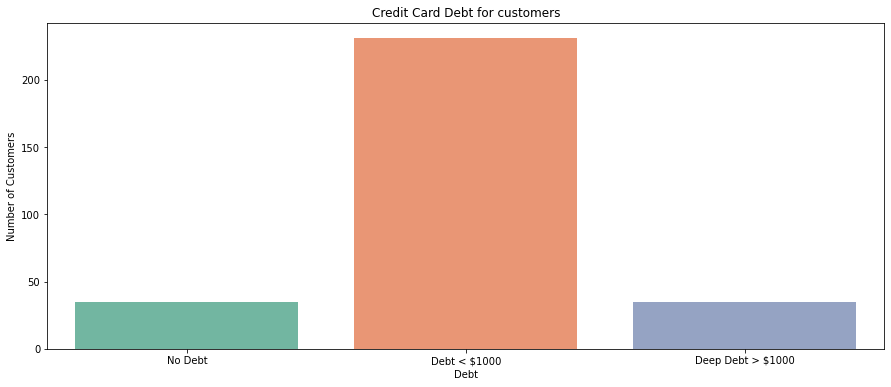

In [35]:
#Plot of groups of people in credit card debt, and those not in credit card debt
aix = ["No Debt", "Debt < $1000", "Deep Debt > $1000"]
aiy = [len(no_debt.values), len(debt.values), len(no_debt.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Credit Card Debt for customers")
plt.xlabel("Debt")
plt.ylabel("Number of Customers")
plt.show()

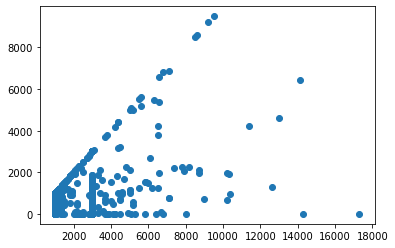

In [64]:
fig1 = plt.scatter(df_credits['credit_limit'], df_credits['ending_balance'])
fig1

In [71]:
df_trans_cred[df_trans_cred['interest_amt'] > 0]

,index,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
9,9,1362746,1,558.73,544.12,14.61,-492.99,1995-01-07,,M,PM
11,11,1362611,19,611.44,604.28,7.16,-362.22,1995-05-04,142249,C,PM
13,13,1362542,4,86.53,77.31,9.22,-577.29,1995-04-01,214456,C,PM
14,14,1362991,33,467.66,462.00,5.66,-342.34,1995-08-03,,M,PM
19,19,1363356,46,230.15,224.59,5.56,-469.76,1995-11-03,,M,PM
...,...,...,...,...,...,...,...,...,...,...,...
20134,20134,1362726,1,1318.40,1297.13,21.27,-539.08,1995-01-06,,M,PM
20140,20140,1363414,30,41.09,40.95,0.14,-280.21,1995-10-07,,M,PM
20145,20145,1362725,38,1784.96,1768.49,16.47,-1549.96,1995-12-05,153305,A,PM
20152,20152,1362549,15,316.60,313.29,3.31,-187.38,1995-04-02,121710,A,PM


In [70]:
df_trans

,index,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,0,27,13625623,0.00,0.00,0.0,3753.34,1995-10-21,121656,A,IQ
1,1,97,13628392,0.00,0.00,0.0,254.49,1995-02-05,153053,V,IQ
2,2,21,13630842,-97.57,-97.57,0.0,3819.56,1995-07-23,0,P,WD
3,3,44,13631412,-0.15,-0.15,0.0,224.05,1995-01-30,0,,FK
4,4,31,13625722,0.00,0.00,0.0,240.55,1995-01-25,204521,B,IQ
...,...,...,...,...,...,...,...,...,...,...,...
77575,77575,77,13631752,-95.71,-95.71,0.0,95.71,1995-02-14,161001,A,TR
77576,77576,94,13626772,-93.90,-93.90,0.0,824.36,1995-03-11,0,P,WD
77577,77577,42,13625262,-10.35,-10.35,0.0,10.36,1995-08-26,0,P,WD
77578,77578,98,13627052,-423.80,-423.80,0.0,162.28,1995-06-13,110209,E,WD


In [61]:
df_spent_cred = df_trans_cred.groupby('cust_id').agg({'tran_amt' : 'mean'})
df_spent_cred

,tran_amt
cust_id,
1362480,60.895625
1362484,16.797636
1362485,-10.572639
1362487,-47.987188
1362489,48.405143
...,...
1363483,0.334805
1363484,12.080513
1363485,139.239565


In [ ]:
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

In [ ]:
# fit and predict
y_km = km.fit_predict(X)

In [ ]:
 def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
# to get # of clusters
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 